In [1]:
# Data from scikit-learn's bundled Digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits.target[::200]

array([0, 1, 4, 2, 4, 1, 7, 2, 2])

In [3]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

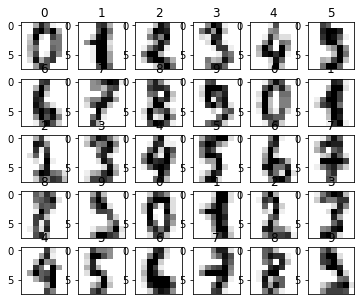

In [4]:
# Data exploration: visualize the digit images
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=5, ncols=6, figsize=(6, 5))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_xticks([])
    axes.set_title(target)
plt.tight_layout

In [5]:
# Split data into training and testing sets
# 75% training and 25% testing by default
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=24)

In [6]:
# Creating model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [7]:
# Training model
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [8]:
# Check predictions
predicted = knn.predict(X=X_test)
expected = y_test
inaccurate = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
inaccurate

[(1, 8), (7, 3), (1, 8), (1, 9)]

In [9]:
# Measure accuracy with score
print(f'{knn.score(X_test, y_test):.2%}')

99.11%


In [10]:
# Measure accuracy with classification report
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.94      1.00      0.97        44
           2       1.00      1.00      1.00        43
           3       1.00      0.98      0.99        53
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        54
           7       0.97      1.00      0.99        37
           8       1.00      0.95      0.97        39
           9       1.00      0.98      0.99        54

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



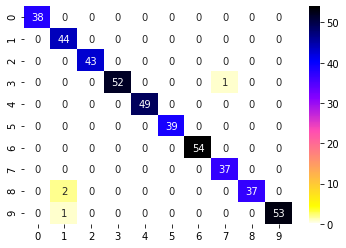

In [11]:
# Measure accuracy with confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='gnuplot2_r')

In [12]:
# K-Fold Cross-Validation with 10 folds
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=24, shuffle=True)

In [13]:
# Train and test folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
print(scores)
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Standard deviation of accuracy: {scores.std():.2%}')

[0.98333333 0.98888889 0.97777778 0.97777778 0.99444444 0.98888889
 1.         0.98324022 0.98324022 0.99441341]
Mean accuracy: 98.72%
Standard deviation of accuracy: 0.71%


In [14]:
# Hyperparameter tuning: find best value for k in kNN algorithm
for k in range(1, 20, 2): # Odd values only to avoid ties
    kfold = KFold(n_splits=10, random_state=24, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=digits.data,
                             y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy = {scores.mean():.2%}; ' +
          f'SD of accuracy = {scores.std():.2%}')

k=1 ; mean accuracy = 98.83%; SD of accuracy = 0.72%
k=3 ; mean accuracy = 98.77%; SD of accuracy = 0.82%
k=5 ; mean accuracy = 98.72%; SD of accuracy = 0.71%
k=7 ; mean accuracy = 98.50%; SD of accuracy = 0.79%
k=9 ; mean accuracy = 98.39%; SD of accuracy = 0.72%
k=11; mean accuracy = 98.22%; SD of accuracy = 0.82%
k=13; mean accuracy = 98.27%; SD of accuracy = 0.98%
k=15; mean accuracy = 97.83%; SD of accuracy = 0.98%
k=17; mean accuracy = 97.77%; SD of accuracy = 0.97%
k=19; mean accuracy = 97.61%; SD of accuracy = 1.03%
